# MNIST Digit Classification
We are using keras mnist dataset -> https://keras.io/examples/mnist_cnn/

<img src="https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png?w=638" />

In [ ]:
!pip3 install keras
!pip3 install tensorflow

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:

num_classes = 10 # We have 10 classes
img_rows, img_cols = 28, 28 # Input image dimensions

# Load mnist data directly splited between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


Keras is a library on top of a neural network backend (the code that actually implements the neural network topologies and layers). TensorFlow (by Google), Theano (open-source) and CNTK (by Microsoft), each library uses different conventions for data arrangement. We have to **prepare data** depending on specified backend.

**Dimension expansion** is needed because libraries consider image dimension triplets as **(width, height, channels)**, we only have 1 channel because our data are `grayscale` images. 

In [3]:
# Ask keras which data format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(f"We have data prepared for backend [{keras.backend.backend()}]")
print(input_shape)  

We have data prepared for backend [tensorflow]
(28, 28, 1)


In [4]:
# Incoming data is in uint8 [0,255]. Cast the input data images to be floats in range [0.0-1.0]  
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
from keras.utils import to_categorical

# Convert class vectors to binary class matrices, like get_dummies on pandas
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:

loss_function = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adadelta()

model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

In [14]:
batch_size = 128 # Train in batches of 128 images
epochs = 4 # Iterate over all data 4 times

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1335 - acc: 0.9608 - val_loss: 0.0633 - val_acc: 0.9791
Epoch 2/4
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0786 - acc: 0.9766 - val_loss: 0.0381 - val_acc: 0.9873
Epoch 3/4
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0614 - acc: 0.9815 - val_loss: 0.0482 - val_acc: 0.9849
Epoch 4/4
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0529 - acc: 0.9835 - val_loss: 0.0295 - val_acc: 0.9899


In [15]:
# Evaluate the model with test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02954166148560471
Test accuracy: 0.9899


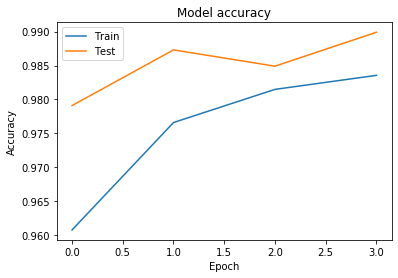

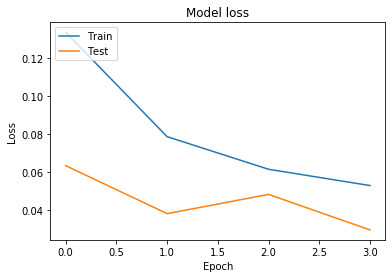

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

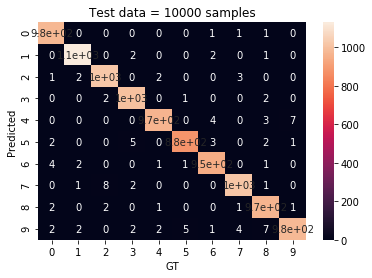

In [24]:
# Plot confusion matrix to have a more detailed view of cross-class missclassifications
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

## Use argmax to project output probabilites as class index label
y_pred = np.argmax(model.predict(x_test), axis=1)
y_t = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_t, y_pred)

sns.heatmap(cm, annot=True)
plt.xlabel("GT")
plt.ylabel("Predicted")
plt.title(f"Test data = {len(y_pred)} samples")
plt.show()

In [25]:
# We have trained a model of...... PARAMETERS!!! WOOW
model.count_params()

1199882

In [26]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Saving a trained keras model


## A) Save Architecture, weights and training configuration

You can use `model.save(<filepath>)` to save a Keras model into a single HDF5 file which will contain:

- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

You can then use `keras.models.load_model(<filepath>)` to reinstantiate your model. load_model will also take care of compiling the model using the saved training configuration (unless the model was never compiled in the first place).


## B) Save only trained weights

If you need to save the weights of a model, you can do so in HDF5 with the code below:

`model.save_weights('my_model_weights.h5')`
Assuming you have code for instantiating your model, you can then load the weights you saved into a model with the same architecture:

`model.load_weights('my_model_weights.h5')`

In [28]:
model.save("data/mnist_train.h5")

In [29]:
model.save_weights('data/mnist_trained_weights.h5')